In [1]:
pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
You should consider upgrading via the '/Users/tao/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#referrence：https://blog.csdn.net/stay_foolish12/article/details/97371586?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161598796116780357245058%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161598796116780357245058&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-9-97371586.pc_search_result_hbase_insert&utm_term=%E6%8A%95%E8%B5%84%E7%BB%84%E5%90%88%E7%AE%A1%E7%90%86

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats
import baostock as bs
import pandas as pd

In [4]:
#通过BaoStock获得上证50成分股股票代码并获取历史数据

In [5]:
lg = bs.login()

login success!


In [6]:
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

login respond error_code:0
login respond  error_msg:success


In [7]:
#获取sz50股票代码
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
result.to_csv("sz50", encoding="gbk", index=False)
print(result)

query_sz50 error_code:0
query_sz50  error_msg:success
    updateDate       code code_name
0   2021-03-08  sh.600000      浦发银行
1   2021-03-08  sh.600009      上海机场
2   2021-03-08  sh.600016      民生银行
3   2021-03-08  sh.600028      中国石化
4   2021-03-08  sh.600030      中信证券
5   2021-03-08  sh.600031      三一重工
6   2021-03-08  sh.600036      招商银行
7   2021-03-08  sh.600048      保利地产
8   2021-03-08  sh.600050      中国联通
9   2021-03-08  sh.600104      上汽集团
10  2021-03-08  sh.600196      复星医药
11  2021-03-08  sh.600276      恒瑞医药
12  2021-03-08  sh.600309      万华化学
13  2021-03-08  sh.600519      贵州茅台
14  2021-03-08  sh.600547      山东黄金
15  2021-03-08  sh.600570      恒生电子
16  2021-03-08  sh.600585      海螺水泥
17  2021-03-08  sh.600588      用友网络
18  2021-03-08  sh.600690      海尔智家
19  2021-03-08  sh.600703      三安光电
20  2021-03-08  sh.600745      闻泰科技
21  2021-03-08  sh.600837      海通证券
22  2021-03-08  sh.600887      伊利股份
23  2021-03-08  sh.600918      中泰证券
24  2021-03-08  sh.601012      隆基股份
25  2021-0

In [8]:
code=result["code"]

In [9]:
#获取对应股票近三年价格数据

In [10]:
history_data = pd.DataFrame(columns = ["date", "code", "close"])
for i in range(0,50):
    data = bs.query_history_k_data_plus(code[i],
    "date,code,close",
    start_date='2018-03-01', end_date='2021-3-01',adjustflag="2")#adjustflag="2"该参数为历史数据前复权
    print('query_history_k_data_plus respond error_code:'+data.error_code)
    print('query_history_k_data_plus respond  error_msg:'+data.error_msg)

    data_list = []
    while (data.error_code == '0') & data.next():
        data_list.append(data.get_row_data())
    result = pd.DataFrame(data_list, columns=data.fields)
    x=result.shape
    print(x)
    if (x[0]==729):
        result.to_csv(code[i], index=0,header=1)
    else:
        code=code.drop([i])#删除近三年价格数据有缺失的股票
    i=i+1
    
    

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
(729, 3)
query_history_k_dat

In [11]:
code=code.reset_index(drop=True)
print(code.shape)

(43,)


In [12]:
#将价格数据合并入一张index为交易日期，columns为股票代码的表格。表格每一列分别代表一只股票的近三年历史收盘价
df=pd.DataFrame(columns=['date','code','close'])
price=pd.DataFrame(np.random.randn(729,43),columns=code)
for i in range(0,43):
    df=df.append(pd.read_csv(code[i]))
    i=i+1  
df=df.reset_index(drop=True)
df.to_csv('df', index=0,header=1) 

In [13]:
print(df)

             date       code       close
0      2018-03-01  sh.600000   11.349745
1      2018-03-02  sh.600000   11.295135
2      2018-03-05  sh.600000   11.304237
3      2018-03-06  sh.600000   11.367948
4      2018-03-07  sh.600000   11.367948
...           ...        ...         ...
31342  2021-02-23  sh.603986  183.200000
31343  2021-02-24  sh.603986  194.330000
31344  2021-02-25  sh.603986  196.410000
31345  2021-02-26  sh.603986  192.500000
31346  2021-03-01  sh.603986  202.800000

[31347 rows x 3 columns]


In [14]:
for i in range(0,43):
    for j in range(0,729):
        price.iloc[j,i]=df.iloc[i*729+j,2]
        j=j+1
    i=i+1

In [15]:
x=pd.DataFrame(columns=['date','code','close'])
x=x.append(pd.read_csv(code[0]))
date=x['date']
print(date)
price=price.set_index(x['date'])
print(price)

0      2018-03-01
1      2018-03-02
2      2018-03-05
3      2018-03-06
4      2018-03-07
          ...    
724    2021-02-23
725    2021-02-24
726    2021-02-25
727    2021-02-26
728    2021-03-01
Name: date, Length: 729, dtype: object
code        sh.600000  sh.600009  sh.600016  sh.600028  sh.600030  sh.600031  \
date                                                                           
2018-03-01  11.349745  47.973376   6.228027   5.146774  17.142223   7.773375   
2018-03-02  11.295135  48.965325   6.176737   5.098448  16.858568   7.669351   
2018-03-05  11.304237  48.838900   6.176737   5.146774  16.896389   7.678808   
2018-03-06  11.367948  47.808051   6.228027   5.211210  17.416423   7.953051   
2018-03-07  11.367948  47.866401   6.198718   5.187046  17.274596   7.915224   
...               ...        ...        ...        ...        ...        ...   
2021-02-23  10.780000  60.090000   5.230000   4.700000  27.600000  44.400000   
2021-02-24  10.600000  60.950000   5.190000

In [16]:
#将价格股票价格标准化，观察股票趋势

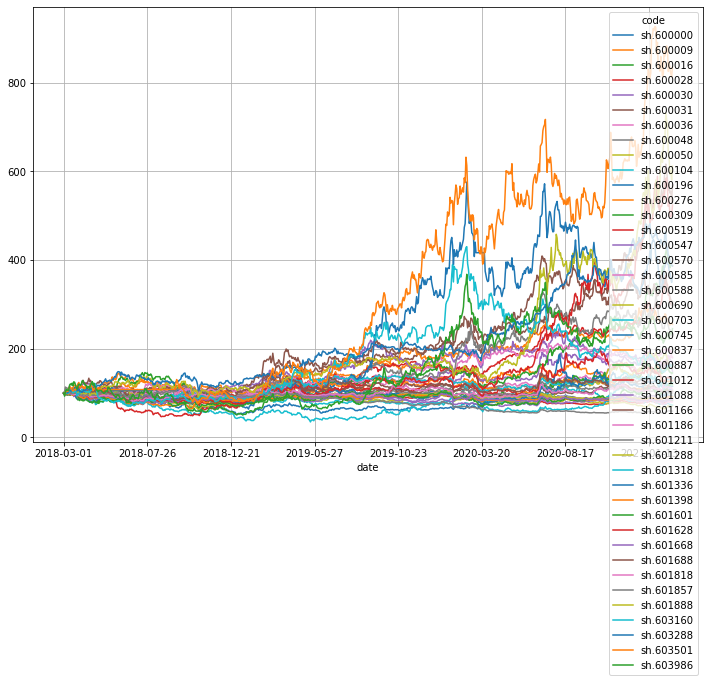

In [17]:
norm_price = (price/price.iloc[0, :])*100
(norm_price).plot(figsize=(12, 8), grid=True) 
plt.savefig('趋势.jpg')

In [18]:
#计算股票的对数收益率，将股票当天价格与前一日比较

In [19]:
log_returns = np.log(price / price.shift(1))
log_returns.head()

code,sh.600000,sh.600009,sh.600016,sh.600028,sh.600030,sh.600031,sh.600036,sh.600048,sh.600050,sh.600104,...,sh.601628,sh.601668,sh.601688,sh.601818,sh.601857,sh.601888,sh.603160,sh.603288,sh.603501,sh.603986
date,,,,,,,,,,,,,,,,,,,,,
2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-02,-0.004823,0.020466,-0.008269,-0.009434,-0.016686,-0.013472,-0.012246,0.006780,0.006231,0.031620,...,-0.011514,-0.009939,-0.012739,-0.011642,-0.007509,-0.012863,-0.017687,0.012581,-0.030495,-0.072713
2018-03-05,0.000805,-0.002585,0.000000,0.009434,0.002241,0.001232,0.003988,0.004046,-0.009360,0.004843,...,0.005588,0.003324,0.004651,0.002339,0.006262,0.004493,0.030470,0.001963,0.044977,0.095322
2018-03-06,0.005620,-0.021333,0.008269,0.012442,0.030314,0.035091,-0.003655,0.045388,-0.011032,-0.003131,...,0.021680,0.007714,0.022937,0.009302,0.012407,0.029265,-0.001350,0.002137,0.014554,0.059732
2018-03-07,0.000000,0.001220,-0.004717,-0.004648,-0.008177,-0.004768,0.024010,-0.009044,-0.019201,0.024776,...,0.000363,-0.009928,-0.010257,-0.004640,-0.011159,0.005607,-0.021041,-0.011989,0.017080,-0.009302


In [20]:
#股票收益率的直方图，由图可见股票收益率分布近似正态分布

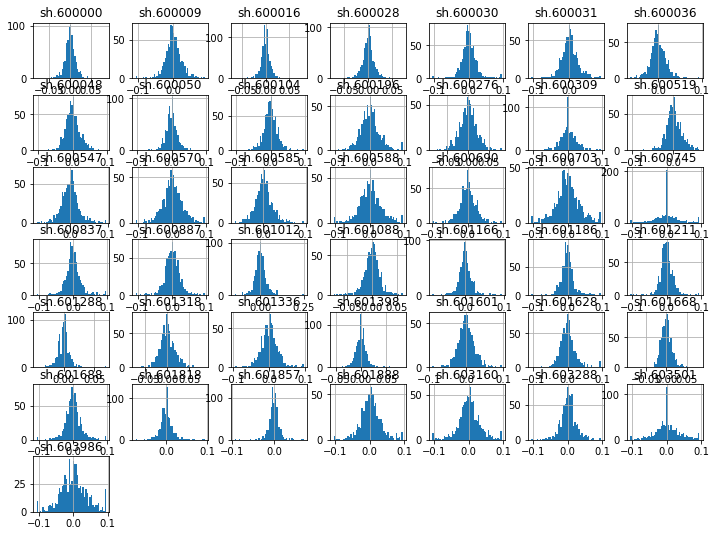

In [21]:
log_returns.hist(bins=50, figsize=(12, 9))
plt.savefig('收益率分布.jpg')

In [22]:
'''从柱状图中看出，每只股票收益率分布近似正态分布。
Markowitz均值-方差投资组合理论需要假设正态分布收益率。
而投资组合的风险取决于投资各组合中资产收益率的相关性。
这样，年化收益率和协方差矩阵就是我们需要计算的。
'''

'从柱状图中看出，每只股票收益率分布近似正态分布。\nMarkowitz均值-方差投资组合理论需要假设正态分布收益率。\n而投资组合的风险取决于投资各组合中资产收益率的相关性。\n这样，年化收益率和协方差矩阵就是我们需要计算的。\n'

In [23]:
#使用对数收益率为收益率
rets = log_returns
#计算年化收益率
year_ret = rets.mean() * 729
#计算协方差矩阵
year_volatility = rets.cov() * 729
print(year_ret)

code
sh.600000   -0.070326
sh.600009    0.243508
sh.600016   -0.186443
sh.600028   -0.119020
sh.600030    0.402381
sh.600031    1.741540
sh.600036    0.595317
sh.600048    0.214057
sh.600050   -0.332666
sh.600104   -0.315370
sh.600196    0.139440
sh.600276    0.936688
sh.600309    1.354574
sh.600519    1.109553
sh.600547    0.532485
sh.600570    1.123007
sh.600585    0.586138
sh.600588    0.850649
sh.600690    0.474110
sh.600703    0.216512
sh.600745    1.287239
sh.600837    0.047163
sh.600887    0.375550
sh.601012    1.658641
sh.601088   -0.118718
sh.601166    0.450608
sh.601186   -0.219971
sh.601211   -0.012416
sh.601288   -0.094856
sh.601318    0.287616
sh.601336    0.037133
sh.601398   -0.088316
sh.601601    0.172684
sh.601628    0.240956
sh.601668   -0.157042
sh.601688    0.028450
sh.601818    0.079530
sh.601857   -0.526014
sh.601888    1.814142
sh.603160    0.502338
sh.603288    1.355091
sh.603501    2.124958
sh.603986    0.899125
dtype: float64


In [24]:
#我们一共有43支股票，随机生成10000种投资组合。分别计算各投资组合对应的收益率和波动率
number_of_assets = 43

portfolio_returns = []
portfolio_volatilities = []
for p in range (10000):
    weights = np.random.random(number_of_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(rets.mean() * weights) * 729)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, 
                    np.dot(rets.cov() * 729, weights))))

In [25]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

In [26]:
#对10000组投资组合的收益率和波动率作散点图

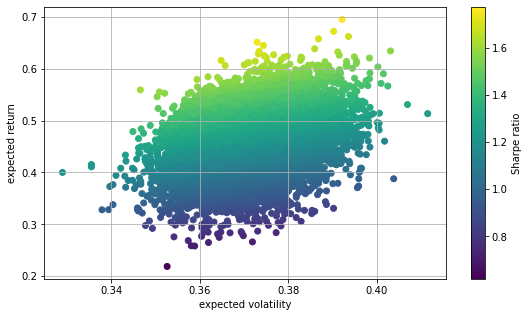

In [27]:
plt.figure(figsize=(9, 5)) #作图大小
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o') #画散点图
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.savefig('10000组投资组合的收益率和波动率作散点图.jpg')

In [28]:
'''
每个点对应某个投资组合，该点有其对应的收益率和波动率（标准差），其颜色为对应的夏普率。可见，越往左上方，夏普率越高。
'''

'\n每个点对应某个投资组合，该点有其对应的收益率和波动率（标准差），其颜色为对应的夏普率。可见，越往左上方，夏普率越高。\n'

In [29]:
def statistics(weights):        
    #根据权重，计算资产组合收益率/波动率/夏普率。
    #输入参数
    #==========
    #weights : array-like 权重数组
    #权重为股票组合中不同股票的权重    
    #返回值
    #=======
    #pret : float
    #      投资组合收益率
    #pvol : float
    #      投资组合波动率
    #pret / pvol : float
    #    夏普率，为组合收益率除以波动率，此处不涉及无风险收益率资产
    #

    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [30]:
#求最大夏普率等于求最小负夏普率，利用scipy.optimize函数求解
def min_func_sharpe(weights):
    return -statistics(weights)[2]
bnds = tuple((0, 1) for x in range(number_of_assets))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
opts = sco.minimize(min_func_sharpe, number_of_assets 
                    * [1. / number_of_assets,], 
                    method='SLSQP',  bounds=bnds, constraints=cons)#'SLSQP'为Sequential Least Squares Programming方法。
print(opts)

     fun: -2.0721209128118527
     jac: array([ 7.87137061e-01,  9.30026412e-01,  8.31140667e-01,  7.23024458e-01,
        1.09719428e+00,  3.81946564e-04,  3.36416066e-01,  7.89223194e-01,
        1.44305187e+00,  1.60637450e+00,  1.34914011e+00,  2.33906597e-01,
       -1.99210644e-03,  1.05107337e-01,  1.42455101e-05,  4.15246785e-01,
        5.31184673e-01,  6.76700801e-01,  1.04419041e+00,  1.77594537e+00,
       -1.15093589e-03,  1.38182613e+00,  1.03870937e+00,  1.85221434e-04,
        9.57494259e-01,  3.16744238e-01,  1.34012574e+00,  1.34599334e+00,
        6.16363138e-01,  8.19727391e-01,  1.38413471e+00,  6.60215467e-01,
        1.05820701e+00,  1.13892609e+00,  1.08972979e+00,  1.50858831e+00,
        6.08042300e-01,  1.26342937e+00, -1.10414624e-03,  9.39024687e-01,
       -7.21722841e-04,  1.19909644e-03,  1.05203286e+00])
 message: 'Optimization terminated successfully'
    nfev: 447
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([4.31627095e-16, 1.

In [31]:
#最大夏普率投资组合的权重为：

In [32]:
opts['x'].round(16)

array([4.00000000e-16, 1.00000000e-16, 1.00000000e-16, 9.00000000e-16,
       3.00000000e-16, 3.03329966e-01, 3.00000000e-16, 2.00000000e-16,
       5.00000000e-16, 7.00000000e-16, 6.00000000e-16, 4.00000000e-16,
       2.19802463e-02, 7.00000000e-16, 8.59690610e-02, 3.00000000e-16,
       1.00000000e-16, 5.00000000e-16, 1.00000000e-16, 5.00000000e-16,
       1.05628341e-02, 2.00000000e-16, 2.00000000e-16, 6.40190449e-02,
       3.00000000e-16, 9.00000000e-16, 2.00000000e-16, 2.00000000e-16,
       5.00000000e-16, 4.00000000e-16, 2.00000000e-16, 4.00000000e-16,
       2.00000000e-16, 1.00000000e-16, 1.00000000e-16, 4.00000000e-16,
       4.00000000e-16, 1.00000000e-16, 1.28543330e-01, 2.00000000e-16,
       2.05829614e-01, 1.79765904e-01, 5.00000000e-16])

In [33]:
#最大夏普率投资组合的收益率，波动率和夏普率分别为：

In [34]:
statistics(opts['x']).round(16)

array([0.55920576, 0.2698712 , 2.07212091])

In [35]:
#定义函数求得在weights比重下投资组合收益率的方差
def min_func_variance(weights):
    return statistics(weights)[1] ** 2
#求最小方差投资组合，利用scipy.optimize函数求解
optv = sco.minimize(min_func_variance, number_of_assets * 
                    [1. / number_of_assets,], method='SLSQP', 
                    bounds=bnds, constraints=cons)
print(optv,statistics(optv['x']).round(16))

     fun: 0.020373704680141345
     jac: array([0.04724565, 0.04097183, 0.04117162, 0.04076589, 0.06948948,
       0.05047526, 0.0596179 , 0.06350645, 0.050727  , 0.04708536,
       0.0429248 , 0.0407944 , 0.05004903, 0.04513855, 0.04068067,
       0.05737587, 0.0529175 , 0.0489382 , 0.05462561, 0.05587168,
       0.04111698, 0.06504369, 0.04802923, 0.04097595, 0.0508677 ,
       0.05195271, 0.05317182, 0.06314078, 0.04037333, 0.0604995 ,
       0.07412598, 0.04348136, 0.07000413, 0.0702162 , 0.0488204 ,
       0.07005209, 0.0493343 , 0.04096399, 0.04601225, 0.04413098,
       0.04064211, 0.04317011, 0.05576676])
 message: 'Optimization terminated successfully'
    nfev: 837
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([8.41861683e-18, 3.54180759e-03, 2.67282132e-01, 3.50063562e-02,
       1.79200450e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.10620725e-17, 0.00000000e+00, 0.00000000e+00, 3.64258478e-02,
       0.00000000e+00, 1.07434440e-17, 9

In [36]:
"""
有效边界
有效边界指有效边界上的每一个点即为给定收益率情况下拥有最小波动率的投资组合的点。
"""


'\n有效边界\n有效边界指有效边界上的每一个点即为给定收益率情况下拥有最小波动率的投资组合的点。\n'

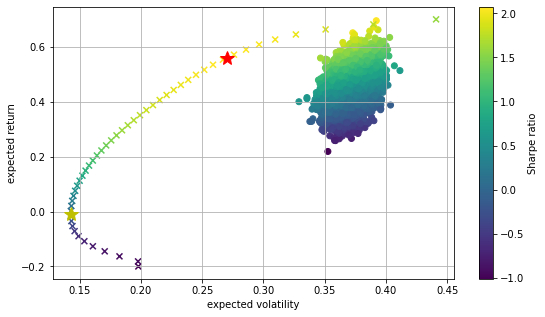

In [37]:
#定义函数求投资组合波动率
def min_func_port(weights):
    return statistics(weights)[1] 
#给定收益率为，从-0.2到0.7之间50等份的值。制造一个线性空间给我们的收益率数组，预设好我们的目标收益率:
target_returns = np.linspace(-0.2, 0.7, 50)
target_volatilities = []
for tret in target_returns:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, number_of_assets * [1. / number_of_assets,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    target_volatilities.append(res['fun'])
    
    #画散点图
plt.figure(figsize=(9, 5))
#圆点为随机资产组合
plt.scatter(portfolio_volatilities, portfolio_returns,
            c=portfolio_returns / portfolio_volatilities, marker='o')
#叉叉为有效边界            
plt.scatter(target_volatilities, target_returns,
            c=target_returns / target_volatilities, marker='x')
#红星为夏普率最大值的资产组合            
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
#黄星为最小方差的资产组合            
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.savefig('有效边界.jpg')